# READ TRAIN DATA

In [35]:
#convert train dataset from txt to csv

import csv
import pandas as pd
import numpy as np


with open('HW3_train.txt', 'r') as txt_file:
    txt_lines = txt_file.readlines()

with open('train.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in txt_lines:
        fields = line.strip().split(',')
        writer.writerow(fields)
        
train = pd.read_csv("train.csv",header = None)
train = train.rename(columns={0: 'output'})
train.head(5)

,output,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
1,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
2,3,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.000,-1.0


# READ TEST DATA

In [36]:
#convert test dataset from txt to csv

import csv
import pandas as pd
import numpy as np


with open('HW3_test.txt', 'r') as txt_file:
    txt_lines = txt_file.readlines()

with open('test.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in txt_lines:
        fields = line.strip().split(',')
        writer.writerow(fields)
        
test = pd.read_csv("test.csv",header = None)
test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.000,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.000,0.264,0.532,-0.210,-0.746,-0.779,-1.000,-1.000,...,0.461,0.418,-0.057,-0.829,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-0.983,0.662,-0.509,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.774,1.000,0.802,0.513,0.009,-0.603,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.000,-0.941,-0.120,0.858,1.000,1.000,1.000,0.698,...,0.841,1.000,0.823,0.203,-0.478,-1.000,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.000,-1.000,-0.933,0.461,0.779,0.584,0.584,0.584,...,1.000,0.857,0.371,-0.397,-0.949,-1.000,-1.0,-1.0,-1.0,-1.0


# TRAIN TEST SPLIT ON DATA

In [37]:
from sklearn.model_selection import train_test_split

X_train = train.iloc[:, 1:].values  
y_train = train.iloc[:, 0].values   
X_test  = test.values

print('Shape of X_train : ', X_train.shape)
print('Shape of Y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)

Shape of X_train :  (1214, 256)
Shape of Y_train :  (1214,)
Shape of X_test :  (326, 256)


# ADABOOST USING WEAK LEARNER

In [38]:
import numpy as np

class DecisionStump:
    
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None
    
    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)
        X_column = X[:, self.feature_index]
        if self.polarity ==1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions

class Adaboost:
    
    def __init__(self, n_clf = 5):
        self.n_clf = n_clf
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        #init weights
        w = np.full(n_samples, (1/n_samples))
        self.clfs = []
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_gini = float('inf')
            error = None
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)
                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1    
                    predictions = predictions.astype(int)
                    gini_impurity = 0
                    for c in [-1, 1]:
                        Dc = y[predictions == c]
                        pk = len(Dc)/len(predictions)
                        if len(Dc) == 0:
                            gini_impurity += 0
                        else:
                            gini_impurity += pk*(1-np.sum((Dc == c))/len(Dc))
                    gini  = w[y != predictions]
                    gini_i = np.sum(gini)
                    if gini_i > 0.5:
                        gini_i = 1-gini_i
                        p = -1
                    
                    if gini_i < min_gini:
                        min_gini = gini_i
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        error = gini_i
            EPS = 1e-10
            clf.alpha = 0.5*np.log((1-error)/(error+EPS)) 
            predictions = clf.predict(X)
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)
            self.clfs.append(clf)
            
    def predict(self,X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis = 0)
        y_pred = np.sign(y_pred)
        return y_pred

# FINDING TRAIN ERROR FOR MULTIPLE BOOSTS

In [39]:
from sklearn.metrics import accuracy_score

num_rounds = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
train_error = []
y_train_change = train.iloc[:, 0].values
y_train_change[y_train_change == 3] = -1
y_train_change[y_train_change == 5] = 1
y_train_change = y_train_change.astype(int)

for n in num_rounds:
    train_error_n = []
    ada = Adaboost(n_clf = n)
    ada.fit(X_train, y_train_change)
    prediction = ada.predict(X_train)
    prediction = prediction.astype(int)
    train_error.append(1 - accuracy_score(y_train_change, prediction))
print(train_error)

[0.05354200988467872, 0.028006589785831926, 0.01976935749588138, 0.014827018121911006, 0.007413509060955503, 0.0032948929159802853, 0.0016474464579900872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# FINDING TEST ERROR BY UPLOADING IN MINER

In [ ]:
num_rounds = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
test_error = []


for n in num_rounds:
        ada = Adaboost(n_clf = n)
        ada.fit(X_train, y_train_change)
        prediction = ada.predict(X_test)
        prediction = prediction.astype(int)
        prediction[prediction == 1] = 5
        prediction[prediction == -1] = 3
        result_df = pd.DataFrame(prediction)
        result_df.to_csv(f'ada_{n}_boost.txt', sep=' ', header=False, index=False)
#test accuracy results from miner for num_rounds
test_accuracy = [0.90,0.92,0.93,0.93,0.93,0.93,0.93,0.92,0.92,0.90,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.93,0.93]
test_error = []
for i in test_accuracy:
    i = 1-i
    test_error.append(i)

In [46]:
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier(max_depth=1)
base_clf.fit(X_train,y_train)
prediction = base_clf.predict(X_test)

result_df = pd.DataFrame(prediction)
result_df.to_csv('ada_tree_single.txt', sep=' ', header=False, index=False)

# PLOTTING GRAPH FOR ROUNDS VS ERROR

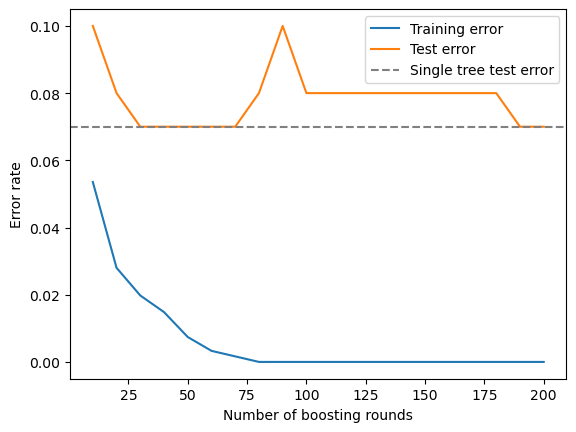

In [58]:
import matplotlib.pyplot as plt

#from miner
tree_test_error = 0.07

plt.plot(num_rounds, train_error, label='Training error')
plt.plot(num_rounds, test_error, label='Test error')
plt.axhline(tree_test_error, linestyle='--', color='gray', label='Single tree test error')
plt.xlabel('Number of boosting rounds')
plt.ylabel('Error rate')
plt.legend()
plt.show()